How to run a star cluster simulation
====================

More realitic star clusters have stars that move and evolve in time.
The movement of stars is caused by their mutual gravity, which we will take care of by means of integrating the equations of motion under Newtonian forces. This is realized using, what we call, and N-body code. Stellar evolution is taken care of by means of a stellar evolution code.

For reference you can read chapter 4 of Portegies Zwart & McMillan 2018 (2018araa.book.....P). 

With this tutorial you will learn
- how to generate inital conditions (mass-function, King-model)
- to initialize an gravitational N-body code
- channels and intra-code data transfer
- detecting binaries
- plotting results
- making cumulative distributions

In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from amuse.units import units

Let's start by generating the initial conditions.
This includes a mass function (for which we adopt the Salpeter power-law), and a Plummer sphere for the spatial distribution. After assigning the masses to the stars in the Plummer sphere, we scale the entire system to virial equilibrium.

In [2]:
n_stars = 100
alpha_IMF = -2.35

from amuse.lab import new_powerlaw_mass_distribution
m_stars = new_powerlaw_mass_distribution(n_stars, 
                                         10.0|units.MSun, 
                                         100.0|units.MSun, 
                                         alpha_IMF)

r_cluster = 1.0 | units.parsec
from amuse.units import nbody_system
converter=nbody_system.nbody_to_si(m_stars.sum(), r_cluster)
from amuse.ic.plummer import new_plummer_model
stars=new_plummer_model(n_stars, convert_nbody=converter)
stars.mass = m_stars
stars.scale_to_standard(converter)

Let's check if this is what we expected.

In [3]:
def plot_snapshot(bodies):
    v = (bodies.vx**2 + bodies.vy**2 + bodies.vz**2).sqrt()
    s = bodies.mass.value_in(units.MSun)
    fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(11, 3))
    ax1.scatter(stars.temperature.value_in(units.K),
                stars.luminosity.value_in(units.LSun), 
                c=v.value_in(units.kms),
                s=s)
    ax1.set_xlim(6.e+4, 20000)
    ax1.set_ylim(1.e+3, 1.e+7)
    ax1.loglog()
    ax1.set_xlabel("T [K]")
    ax1.set_ylabel("L [$L_\odot$]")
    ax2.scatter(bodies.x.value_in(units.pc), 
                bodies.y.value_in(units.pc), 
                c=v.value_in(units.kms), 
                s=s)
    pyplot.gca().set_aspect('equal', adjustable='box')
    ax2.set_xlabel("x [pc]")
    ax2.set_ylabel("y [pc]")
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-5, 5)
    pyplot.show()


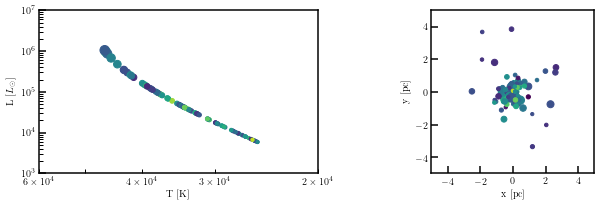

In [4]:
from amuse.community.ph4.interface import ph4
from amuse.community.seba.interface import SeBa
from amuse.ext.LagrangianRadii import LagrangianRadii

stellar = SeBa()
stellar.particles.add_particles(stars)

gravity = ph4(converter)
gravity.particles.add_particles(stars)
ch_s2g = stellar.particles.new_channel_to(gravity.particles)
ch_g2l = gravity.particles.new_channel_to(stars)
ch_s2l = stellar.particles.new_channel_to(stars)
ch_s2l.copy()

plot_snapshot(stars)

Evolved to t= 0.33962035826 Myr 0.340021574777 Myr mass= 2230.57068919 MSun rvir= 0.941483336469 parsec
Evolved to t= 0.681415946321 Myr 0.681426600809 Myr mass= 2217.7208304 MSun rvir= 0.964604903739 parsec
Evolved to t= 1.02572354456 Myr 1.02590596296 Myr mass= 2203.89288151 MSun rvir= 0.961824353695 parsec
Evolved to t= 1.37295449047 Myr 1.37299851081 Myr mass= 2189.02973462 MSun rvir= 1.01072548801 parsec
Evolved to t= 1.72360351157 Myr 1.723780262 Myr mass= 2173.13695668 MSun rvir= 1.02632178653 parsec
Evolved to t= 2.07824445413 Myr 2.07825121654 Myr mass= 2156.33952924 MSun rvir= 0.945571829609 parsec
Evolved to t= 2.43749096919 Myr 2.43794854248 Myr mass= 2139.00336814 MSun rvir= 1.00061608085 parsec
Evolved to t= 2.80185774974 Myr 2.80256480621 Myr mass= 2122.04102797 MSun rvir= 1.13108711315 parsec
Evolved to t= 3.17133862594 Myr 3.17148514051 Myr mass= 2107.48344114 MSun rvir= 1.26058638821 parsec
Evolved to t= 3.54446232379 Myr 3.54470954537 Myr mass= 2052.93642379 MSun rvi

Evolved to t= 4.08904468873 Myr 4.08917447208 Myr mass= 1999.73016547 MSun rvir= 1.09404768556 parsec
Evolved to t= 4.08955499725 Myr 4.0897893393 Myr mass= 1999.72265392 MSun rvir= 1.08985820345 parsec
Evolved to t= 4.09006530578 Myr 4.09009677291 Myr mass= 1999.71514409 MSun rvir= 1.08745304815 parsec
Evolved to t= 4.09057561431 Myr 4.09071164013 Myr mass= 1999.70763599 MSun rvir= 1.08191052829 parsec
Evolved to t= 4.09108592284 Myr 4.09117279055 Myr mass= 1999.70012962 MSun rvir= 1.07701254036 parsec
Evolved to t= 4.09159623136 Myr 4.09163394097 Myr mass= 1999.69262497 MSun rvir= 1.07136763698 parsec
Evolved to t= 4.09210653989 Myr 4.09224880819 Myr mass= 1999.68512205 MSun rvir= 1.06246617526 parsec
Evolved to t= 4.09261684742 Myr 4.09270995861 Myr mass= 1999.67762088 MSun rvir= 1.05455123209 parsec
Evolved to t= 4.09261684842 Myr 4.09270995861 Myr mass= 1999.67762087 MSun rvir= 1.05455123209 parsec
Evolved to t= 4.11477401763 Myr 4.11530632909 Myr mass= 1999.35068292 MSun rvir= 1.

Evolved to t= 4.54825990989 Myr 4.54848028828 Myr mass= 1901.47745263 MSun rvir= 1.4869726653 parsec
Evolved to t= 4.5488542848 Myr 4.5490951555 Myr mass= 1901.47050685 MSun rvir= 1.48721211009 parsec
Evolved to t= 4.54944865971 Myr 4.54971002272 Myr mass= 1901.46355188 MSun rvir= 1.48744904868 parsec
Evolved to t= 4.55004303462 Myr 4.55032488995 Myr mass= 1901.45658765 MSun rvir= 1.48768301109 parsec
Evolved to t= 4.55063740953 Myr 4.55093975717 Myr mass= 1901.44961408 MSun rvir= 1.48791350778 parsec
Evolved to t= 4.55123178444 Myr 4.55124719078 Myr mass= 1901.44263108 MSun rvir= 1.48802747534 parsec
Evolved to t= 4.55182615836 Myr 4.55186205801 Myr mass= 1901.43563858 MSun rvir= 1.48825183313 parsec
Evolved to t= 4.55182615936 Myr 4.55186205801 Myr mass= 1901.43563857 MSun rvir= 1.48825183313 parsec
Evolved to t= 4.57615643637 Myr 4.57645674696 Myr mass= 1901.12906788 MSun rvir= 1.49919960832 parsec
Evolved to t= 4.57615643737 Myr 4.57645674696 Myr mass= 1901.12906787 MSun rvir= 1.49

Evolved to t= 4.91856105429 Myr 4.91863035702 Myr mass= 1841.32291602 MSun rvir= 1.8472222682 parsec
Evolved to t= 4.91965831986 Myr 4.91986009147 Myr mass= 1841.31423287 MSun rvir= 1.84445464173 parsec
Evolved to t= 4.92075558542 Myr 4.9207823923 Myr mass= 1841.30555147 MSun rvir= 1.84146041303 parsec
Evolved to t= 4.92185285098 Myr 4.92185840995 Myr mass= 1841.29687181 MSun rvir= 1.83633106875 parsec
Evolved to t= 4.92295011655 Myr 4.92308814439 Myr mass= 1841.28819391 MSun rvir= 1.82639457626 parsec
Evolved to t= 4.92404738211 Myr 4.92408730363 Myr mass= 1841.27951777 MSun rvir= 1.81088716232 parsec
Evolved to t= 4.92514464768 Myr 4.92516332127 Myr mass= 1841.27084339 MSun rvir= 1.76751814553 parsec
Evolved to t= 4.92624191224 Myr 4.92624414257 Myr mass= 1841.26217079 MSun rvir= 1.31566998527 parsec
Evolved to t= 4.92624191324 Myr 4.92624414257 Myr mass= 1814.84408907 MSun rvir= 1.31334845785 parsec
Evolved to t= 4.9790161075 Myr 4.97919477857 Myr mass= 1814.43039192 MSun rvir= 1.93

Evolved to t= 5.50468814866 Myr 5.50475253814 Myr mass= 1711.50777995 MSun rvir= 2.09031031943 parsec
Evolved to t= 5.50546536748 Myr 5.50552112217 Myr mass= 1711.50163038 MSun rvir= 2.1154329462 parsec
Evolved to t= 5.50624258631 Myr 5.5062897062 Myr mass= 1711.49547724 MSun rvir= 2.13345366298 parsec
Evolved to t= 5.50701980514 Myr 5.50705829023 Myr mass= 1711.48932055 MSun rvir= 2.14679617092 parsec
Evolved to t= 5.50779702397 Myr 5.50782687425 Myr mass= 1711.48316032 MSun rvir= 2.15702341992 parsec
Evolved to t= 5.5085742428 Myr 5.50859545828 Myr mass= 1711.47699657 MSun rvir= 2.16510580657 parsec
Evolved to t= 5.50935146163 Myr 5.50951775912 Myr mass= 1711.47082932 MSun rvir= 2.17282315544 parsec
Evolved to t= 5.51012868045 Myr 5.51013262634 Myr mass= 1711.46465859 MSun rvir= 2.17708384807 parsec
Evolved to t= 5.51090589828 Myr 5.51105492718 Myr mass= 1711.45848439 MSun rvir= 2.18248472414 parsec
Evolved to t= 5.51090589928 Myr 5.51105492718 Myr mass= 1711.45848438 MSun rvir= 2.18

Evolved to t= 5.99824665603 Myr 5.99833720206 Myr mass= 1708.42485046 MSun rvir= 2.39845123979 parsec
Evolved to t= 5.99824665703 Myr 5.99833720206 Myr mass= 1708.42485045 MSun rvir= 2.39845123979 parsec
Evolved to t= 5.99912927602 Myr 5.9992595029 Myr mass= 1708.42088567 MSun rvir= 2.40442671936 parsec
Evolved to t= 6.00001189501 Myr 6.00018180374 Myr mass= 1708.41692067 MSun rvir= 2.40933404572 parsec
Evolved to t= 6.000894514 Myr 6.00110410457 Myr mass= 1708.41295615 MSun rvir= 2.41342592452 parsec
Evolved to t= 6.00177713299 Myr 6.00233383902 Myr mass= 1708.40899283 MSun rvir= 2.4179120823 parsec
Evolved to t= 6.00265975198 Myr 6.00294870624 Myr mass= 1708.40503117 MSun rvir= 2.41982202339 parsec
Evolved to t= 6.00297648683 Myr 6.00302556465 Myr mass= 1708.4036097 MSun rvir= 2.42004711301 parsec
Evolved to t= 6.00297648783 Myr 6.00302556465 Myr mass= 1686.77054146 MSun rvir= 2.38405141771 parsec
Evolved to t= 6.00385910682 Myr 6.00417844069 Myr mass= 1686.76658211 MSun rvir= 2.3870

Evolved to t= 6.32761280424 Myr 6.32821346765 Myr mass= 1622.79220347 MSun rvir= 2.6251954238 parsec
Evolved to t= 6.32893432 Myr 6.3294432021 Myr mass= 1622.78681691 MSun rvir= 2.625978931 parsec
Evolved to t= 6.33025583576 Myr 6.33067293654 Myr mass= 1622.7814104 MSun rvir= 2.62675038593 parsec
Evolved to t= 6.33157735151 Myr 6.33190267099 Myr mass= 1622.77598382 MSun rvir= 2.6275105745 parsec
Evolved to t= 6.33289886727 Myr 6.33313240544 Myr mass= 1622.77053715 MSun rvir= 2.62826018174 parsec
Evolved to t= 6.33422038303 Myr 6.33436213989 Myr mass= 1622.76507054 MSun rvir= 2.62899980339 parsec
Evolved to t= 6.33554189879 Myr 6.33559187433 Myr mass= 1622.75958423 MSun rvir= 2.62972995602 parsec
Evolved to t= 6.33686341454 Myr 6.33805134323 Myr mass= 1622.75407864 MSun rvir= 2.63116400426 parsec
Evolved to t= 6.3381849293 Myr 6.33835877684 Myr mass= 1622.74855431 MSun rvir= 2.6313405001 parsec
Evolved to t= 6.3381849303 Myr 6.33835877684 Myr mass= 1602.28223617 MSun rvir= 2.60951531444

Evolved to t= 6.61437496769 Myr 6.61443416034 Myr mass= 1581.52787423 MSun rvir= 2.60417436088 parsec
Evolved to t= 6.61574902295 Myr 6.6159713284 Myr mass= 1581.52407646 MSun rvir= 2.61421094868 parsec
Evolved to t= 6.61712307821 Myr 6.61720106285 Myr mass= 1581.52027064 MSun rvir= 2.62025880987 parsec
Evolved to t= 6.61849713346 Myr 6.61873823091 Myr mass= 1581.51645664 MSun rvir= 2.62617949376 parsec
Evolved to t= 6.61987118772 Myr 6.61996796536 Myr mass= 1581.51263438 MSun rvir= 2.6299967548 parsec
Evolved to t= 6.61987118872 Myr 6.61996796536 Myr mass= 1561.91219534 MSun rvir= 2.62098668259 parsec
Evolved to t= 6.67995063885 Myr 6.68022495329 Myr mass= 1561.73479309 MSun rvir= 2.62110599667 parsec
Evolved to t= 6.67995063985 Myr 6.68022495329 Myr mass= 1561.73479309 MSun rvir= 2.62110599667 parsec
Evolved to t= 6.68133861438 Myr 6.68145468774 Myr mass= 1561.73069309 MSun rvir= 2.61714097902 parsec
Evolved to t= 6.68272658892 Myr 6.6829918558 Myr mass= 1561.72658947 MSun rvir= 2.61

Evolved to t= 7.13180076526 Myr 7.13184492919 Myr mass= 1503.48501414 MSun rvir= 2.70791913751 parsec
Evolved to t= 7.13327395822 Myr 7.13368953086 Myr mass= 1503.48112128 MSun rvir= 2.70604245138 parsec
Evolved to t= 7.13474715017 Myr 7.13491926531 Myr mass= 1503.4772221 MSun rvir= 2.70457489168 parsec
Evolved to t= 7.13474715117 Myr 7.13491926531 Myr mass= 1485.24381759 MSun rvir= 2.7338355678 parsec
Evolved to t= 7.13878419504 Myr 7.13922333588 Myr mass= 1485.23308442 MSun rvir= 2.72646874123 parsec
Evolved to t= 7.13878419604 Myr 7.13922333588 Myr mass= 1485.23308442 MSun rvir= 2.72646874123 parsec
Evolved to t= 7.14026084787 Myr 7.14045307033 Myr mass= 1485.22915208 MSun rvir= 2.72370566197 parsec
Evolved to t= 7.1417374997 Myr 7.142297672 Myr mass= 1485.2252132 MSun rvir= 2.71890172874 parsec
Evolved to t= 7.14321415154 Myr 7.14352740645 Myr mass= 1485.22126773 MSun rvir= 2.71524562707 parsec
Evolved to t= 7.14469080337 Myr 7.14475714089 Myr mass= 1485.21731567 MSun rvir= 2.71126

Evolved to t= 7.48212135588 Myr 7.48231924678 Myr mass= 1430.65557182 MSun rvir= 2.7960787165 parsec
Evolved to t= 7.48366496272 Myr 7.48416384845 Myr mass= 1430.65286434 MSun rvir= 2.79677106584 parsec
Evolved to t= 7.48520856957 Myr 7.4853935829 Myr mass= 1430.65015432 MSun rvir= 2.79722589594 parsec
Evolved to t= 7.48675217641 Myr 7.48785305179 Myr mass= 1430.64744172 MSun rvir= 2.79812019424 parsec
Evolved to t= 7.48829578325 Myr 7.48846791901 Myr mass= 1430.64472652 MSun rvir= 2.7983400807 parsec
Evolved to t= 7.4898393891 Myr 7.49031252069 Myr mass= 1430.64200869 MSun rvir= 2.79899272258 parsec
Evolved to t= 7.4898393901 Myr 7.49031252069 Myr mass= 1413.21970731 MSun rvir= 2.79894104835 parsec
Evolved to t= 7.52640108529 Myr 7.52843428856 Myr mass= 1413.15353265 MSun rvir= 2.81007752598 parsec
Evolved to t= 7.52640108629 Myr 7.52843428856 Myr mass= 1413.15353265 MSun rvir= 2.81007752598 parsec
Evolved to t= 7.52795558819 Myr 7.52843428856 Myr mass= 1413.15071736 MSun rvir= 2.8100

Evolved to t= 8.10225129083 Myr 8.10272027562 Myr mass= 1362.23731329 MSun rvir= 2.97781742711 parsec
Evolved to t= 8.10392093191 Myr 8.10395001007 Myr mass= 1362.2348326 MSun rvir= 2.97788112729 parsec
Evolved to t= 8.10559057299 Myr 8.10640947896 Myr mass= 1362.23234849 MSun rvir= 2.97794296378 parsec
Evolved to t= 8.10562209392 Myr 8.10640947896 Myr mass= 1362.23230159 MSun rvir= 2.97794294969 parsec
Evolved to t= 8.10562209492 Myr 8.10640947896 Myr mass= 1346.02195699 MSun rvir= 2.97219607583 parsec
Evolved to t= 8.19021376344 Myr 8.1924908903 Myr mass= 1345.8821528 MSun rvir= 3.00263637772 parsec
Evolved to t= 8.27480543196 Myr 8.27611283274 Myr mass= 1345.73647298 MSun rvir= 3.03062845606 parsec
Evolved to t= 8.28864880079 Myr 8.29086964611 Myr mass= 1345.71263704 MSun rvir= 3.03743068319 parsec
Evolved to t= 8.28864880179 Myr 8.29086964611 Myr mass= 1345.71263704 MSun rvir= 3.03743068318 parsec
Evolved to t= 8.29006050702 Myr 8.29086964611 Myr mass= 1345.71046545 MSun rvir= 3.03

Evolved to t= 8.71074664224 Myr 8.71082395999 Myr mass= 1329.49325996 MSun rvir= 3.19213714211 parsec
Evolved to t= 8.71225985342 Myr 8.71266856166 Myr mass= 1329.49084796 MSun rvir= 3.19289731866 parsec
Evolved to t= 8.71377306359 Myr 8.71389829611 Myr mass= 1329.48843401 MSun rvir= 3.19340864091 parsec
Evolved to t= 8.71377306459 Myr 8.71389829611 Myr mass= 1329.48843401 MSun rvir= 3.19340864091 parsec
Evolved to t= 8.74060191199 Myr 8.74095245395 Myr mass= 1329.44570589 MSun rvir= 3.20541479538 parsec
Evolved to t= 8.74060191299 Myr 8.74095245395 Myr mass= 1329.44570589 MSun rvir= 3.20541479538 parsec
Evolved to t= 8.74212529693 Myr 8.7421821884 Myr mass= 1329.44352007 MSun rvir= 3.20598781272 parsec
Evolved to t= 8.74364868087 Myr 8.7446416573 Myr mass= 1329.44133313 MSun rvir= 3.20713662897 parsec
Evolved to t= 8.74517206481 Myr 8.74525652452 Myr mass= 1329.43914506 MSun rvir= 3.20742566382 parsec
Evolved to t= 8.74669544875 Myr 8.74710112619 Myr mass= 1329.43695584 MSun rvir= 3.2

Evolved to t= 9.00648659619 Myr 9.00657509465 Myr mass= 1314.25131568 MSun rvir= 3.17934401159 parsec
Evolved to t= 9.09833974627 Myr 9.10003491267 Myr mass= 1314.17225129 MSun rvir= 3.3063656781 parsec
Evolved to t= 9.19019289635 Myr 9.19349473069 Myr mass= 1314.07608347 MSun rvir= 3.31261882598 parsec
Evolved to t= 9.22129735384 Myr 9.22300835744 Myr mass= 1314.04217426 MSun rvir= 3.3088143532 parsec
Evolved to t= 9.22129735484 Myr 9.22300835744 Myr mass= 1314.04217426 MSun rvir= 3.3088143532 parsec
Evolved to t= 9.22312552654 Myr 9.22331579105 Myr mass= 1314.0401762 MSun rvir= 3.30876176451 parsec
Evolved to t= 9.22495369824 Myr 9.22546782633 Myr mass= 1314.03817327 MSun rvir= 3.30839330859 parsec
Evolved to t= 9.22678186994 Myr 9.22792729523 Myr mass= 1314.03616542 MSun rvir= 3.30796472386 parsec
Evolved to t= 9.22861004163 Myr 9.22915702967 Myr mass= 1314.03415258 MSun rvir= 3.30774788348 parsec
Evolved to t= 9.23043821333 Myr 9.23161649857 Myr mass= 1314.03213468 MSun rvir= 3.307

Evolved to t= 9.51342558515 Myr 9.51445542153 Myr mass= 1255.23962183 MSun rvir= 3.23952282839 parsec
Evolved to t= 9.51514287054 Myr 9.51568515598 Myr mass= 1255.2386778 MSun rvir= 3.2397004848 parsec
Evolved to t= 9.51686015594 Myr 9.51691489043 Myr mass= 1255.23773201 MSun rvir= 3.23987598157 parsec
Evolved to t= 9.51857744133 Myr 9.51937435932 Myr mass= 1255.23678444 MSun rvir= 3.24022087167 parsec
Evolved to t= 9.52029472672 Myr 9.52060409377 Myr mass= 1255.23583508 MSun rvir= 3.24038973534 parsec
Evolved to t= 9.52201201212 Myr 9.52306356266 Myr mass= 1255.23488391 MSun rvir= 3.24072111468 parsec
Evolved to t= 9.52339446883 Myr 9.52367842989 Myr mass= 1255.23411702 MSun rvir= 3.24080224463 parsec
Evolved to t= 9.52339446983 Myr 9.52367842989 Myr mass= 1255.23411702 MSun rvir= 3.24080224463 parsec
Evolved to t= 9.61973304639 Myr 9.62144231848 Myr mass= 1255.17421817 MSun rvir= 3.24183313511 parsec
Evolved to t= 9.6771588292 Myr 9.67801010307 Myr mass= 1255.1397036 MSun rvir= 3.219

Evolved to t= 9.93191840745 Myr 9.93256513373 Myr mass= 1183.32762354 MSun rvir= 3.26318670401 parsec
Evolved to t= 9.93376726423 Myr 9.93379486818 Myr mass= 1183.32642728 MSun rvir= 3.2635570906 parsec
Evolved to t= 9.93561612102 Myr 9.93625433708 Myr mass= 1183.32522628 MSun rvir= 3.26429431975 parsec
Evolved to t= 9.9374649778 Myr 9.93748407153 Myr mass= 1183.32402049 MSun rvir= 3.26466030419 parsec
Evolved to t= 9.93931383458 Myr 9.93994354042 Myr mass= 1183.32280986 MSun rvir= 3.26538609979 parsec
Evolved to t= 9.94116269136 Myr 9.94117327487 Myr mass= 1183.32159434 MSun rvir= 3.26574513752 parsec
Evolved to t= 9.94301154714 Myr 9.94363274376 Myr mass= 1183.3203739 MSun rvir= 3.26645482171 parsec
Evolved to t= 9.94301154814 Myr 9.94363274376 Myr mass= 1169.106138 MSun rvir= 3.2741340144 parsec
Evolved to t= 9.99617629076 Myr 10.0002005284 Myr mass= 1169.06613275 MSun rvir= 3.28488916276 parsec
Evolved to t= 9.99617629176 Myr 10.0002005284 Myr mass= 1169.06613275 MSun rvir= 3.28488

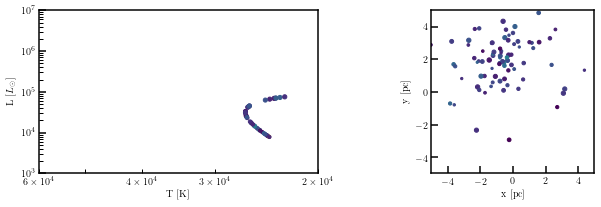

In [5]:
end_time = 10.0 | units.Myr
model_time = 0 | units.Myr
rvir = [] | units.pc
time = [] | units.Myr
while(model_time<end_time):
    dt = stellar.particles.time_step.min()
    model_time += dt
    stellar.evolve_model(model_time)
    ch_s2g.copy()
    ch_s2l.copy()
    gravity.evolve_model(model_time)
    ch_g2l.copy()
    print("Evolved to t=", stellar.model_time.in_(units.Myr), 
          gravity.model_time.in_(units.Myr),
         "mass=", stars.mass.sum().in_(units.MSun), 
          "rvir=", stars.virial_radius().in_(units.pc))
    rvir.append(stars.virial_radius())
    time.append(model_time)
    
plot_snapshot(stars)
stellar.stop()
gravity.stop()

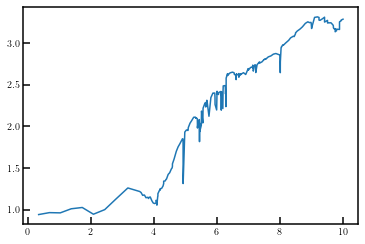

In [6]:
pyplot.plot(time.value_in(units.Myr), rvir.value_in(units.parsec))
pyplot.show()

You have performed a small experiment in which a population of stars was evolved from zero-age to an age of 10Myr.
The stars were selected randomly from a Salpeter mass function, and distributed in a virialized Plummer sphere with a characteristic (Plummer) radius of 1pc.

Assignmnets and questions:
---------------

### Question 1:
You have plotted the Hertzsprung-Russel diagram and he x-y projection of the cluster before and after the simulation. Described the differences.

### Assignment 1:
Rerun the calculation, but store the time and the virial radius in arrays. Make a plot of the virial radius as a function of time.

### Question 2:
Why is the cluster expanding? And why only after a few Myr?

### Question 3:
Why does it take a while before the cluster starts expanding?

### Question 4:
The virial radius does not expand monotomeously. Why is that?

### Assignment 2:
Rerun the calculation without stellar evolution and quantify the difference in which the cluster expands with- and without taking stellar evolution into account. 
When rerunning, make sure that you are using the same initial random seed for generating the initial mass function as well as for assigning the stellar positions and velocities.

Can you explain explain the difference between the simulation with- and the one without stellar evolution?

### Question 5:
In a previous assignment you have been checking binary formation.
What will happen here if you would continue the run until the first binary forms?

### Assignmnet 6:
Add diagnostic checking for energy conservation to the code.
Make sure to check the energy conservation for stellar evolution and stellar dynamics separately.

### Question 6:
Make a plot of the total, the potential and the kinetic energy of the N-body system as a function of time.

To what degree is the total energy conserved?
Is the amount of energy conservation sufficient to warrant a scientifically valid result, and if so, why is this the case?

### Assignment 7:
Replace the event-driven approach from the script and replace is with a simple time stepping in which you step-over from one code to the other every million years.

Now check the evolution of the virial radius and the energy conservation of the code again, and discuss the difference with the original event-driven approach.